# ML Zoomcamp Homework 3

## Preparation

In [1]:
#getting the data
#!wget -O ../data/housing.csv https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [2]:
# listing the data folder
!ls ../data

car-prices.csv	housing.csv


## Importing

In [3]:
import numpy   as np
import pandas  as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics         import mutual_info_score, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge

## Loading Data

In [4]:
df = pd.read_csv('../data/housing.csv')

In [5]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


## Preparing Data

In [6]:
df = df.fillna(0)
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [8]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842


## Question 1
What is the most frequent observation (mode) for the column `ocean_proximity`?

In [9]:
most_frequent = df['ocean_proximity'].value_counts().index[0]
most_frequent

'<1H OCEAN'

In [10]:
print(f'The most frequent observation for the ocean proximity columns is: {most_frequent}')

The most frequent observation for the ocean proximity columns is: <1H OCEAN


## Question 2
What are the two features that have the biggest correlation in this dataset?

In [11]:
df_num = df.drop(['ocean_proximity', 'median_house_value'], axis = 1)
df_num.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842


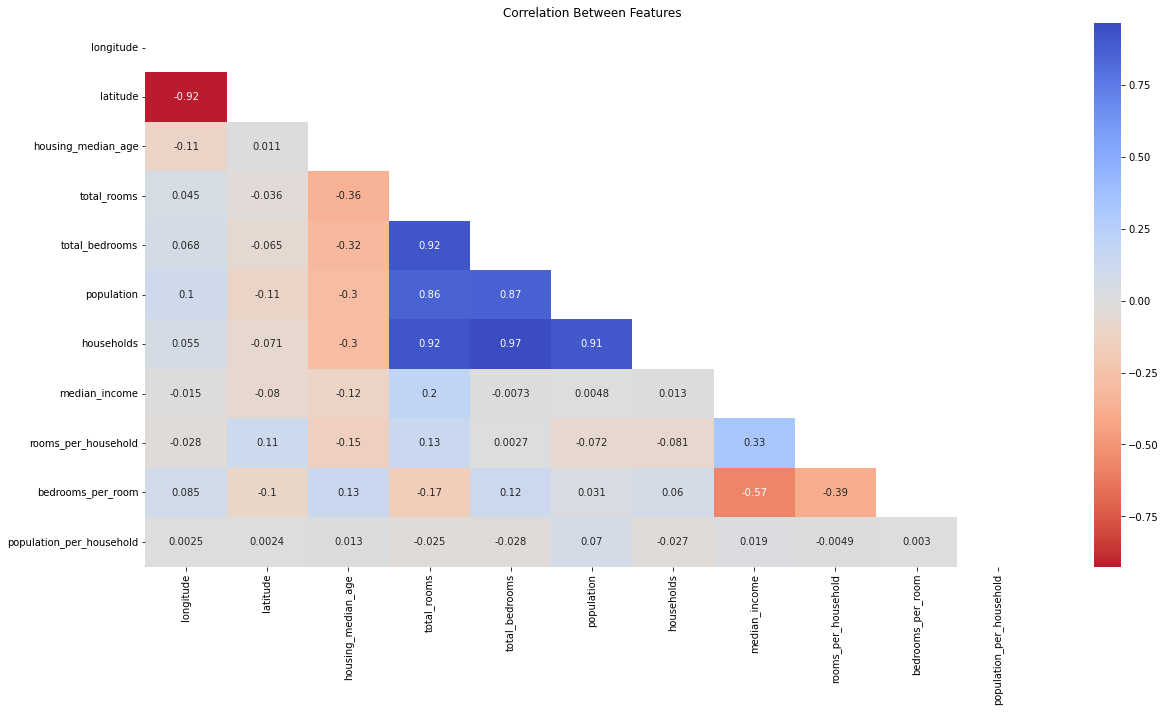

In [12]:
# calculating pearson correlations
df_corr = df_num.corr(method = 'pearson')

## plotting
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (20,10))
sns.heatmap(df_corr,cmap='coolwarm_r',mask = mask,annot=True, 
            center = 0,)
plt.title('Correlation Between Features');

The highest correlation is between `total_bedrooms` and `households`: 97%

In [13]:
house_value_mean = df['median_house_value'].mean()

df['above_average'] = df['median_house_value'].apply(lambda x: 1 if x > house_value_mean else 0)

In [14]:
df['above_average'].value_counts()

0    12255
1     8385
Name: above_average, dtype: int64

In [15]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [16]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

df_train = df_train.drop(['above_average', 'median_house_value'], axis = 1)
df_val = df_val.drop(['above_average', 'median_house_value'], axis = 1)
df_test = df_test.drop(['above_average', 'median_house_value'], axis = 1)

## Question 3

In [19]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456
...,...,...,...,...,...,...,...,...,...,...,...,...
12379,-118.29,33.79,16.0,1867.0,571.0,951.0,498.0,3.3427,<1H OCEAN,3.748996,0.305838,1.909639
12380,-121.34,38.04,16.0,3295.0,565.0,2279.0,576.0,3.6083,INLAND,5.720486,0.171472,3.956597
12381,-116.99,32.74,18.0,3341.0,611.0,1952.0,602.0,3.9844,<1H OCEAN,5.549834,0.182879,3.242525
12382,-117.87,33.84,16.0,1545.0,354.0,730.0,350.0,4.5112,<1H OCEAN,4.414286,0.229126,2.085714


In [20]:
score = mutual_info_score(y_train, df_train.ocean_proximity.values)
round(score, 2)

0.1

## Question 4

In [21]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [22]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [23]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [24]:
y_preds = model.predict(X_val)

In [25]:
acc_score = accuracy_score(y_val, y_preds)

In [26]:
round(acc_score, 2)

0.84

## Question 5

In [27]:
def train_without_feat(df_train_tmp, df_val_tmp, y_train_tmp, y_val_tmp):
    dv = DictVectorizer(sparse=False)

    train_dict = df_train_tmp.to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val_tmp.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train_tmp)
    y_preds = model.predict(X_val)
    baseline_acc_score = accuracy_score(y_val_tmp, y_preds)
    
    return baseline_acc_score

In [28]:
results = {
    'feat': [],
    'acc': []
}

In [29]:
baseline_model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
baseline_model.fit(X_train, y_train)
y_preds = baseline_model.predict(X_val)
baseline_acc_score = accuracy_score(y_val, y_preds)
baseline_acc_score

0.8355135658914729

In [30]:
for feat in df_train.columns:
    df_train_tmp = df_train.drop(feat, axis = 1).copy()
    df_val_tmp = df_val.drop(feat, axis = 1).copy()
    
    acc_tmp = train_without_feat(df_train_tmp.copy(), df_val_tmp.copy(), y_train.copy(), y_val.copy())
    
    results['feat'].append(feat)
    results['acc'].append(baseline_acc_score - acc_tmp)

In [31]:
pd.DataFrame(results).sort_values('acc', ascending=True)

,feat,acc
3,total_rooms,-0.002665
10,bedrooms_per_room,-0.001211
11,population_per_household,-0.000727
4,total_bedrooms,-0.000242
9,rooms_per_household,-0.000242
1,latitude,0.001211
6,households,0.002180
0,longitude,0.002665
2,housing_median_age,0.003876
5,population,0.009205


## Question 6

In [32]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [33]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [34]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

df_train = df_train.drop(['above_average', 'median_house_value'], axis = 1)
df_val = df_val.drop(['above_average', 'median_house_value'], axis = 1)
df_test = df_test.drop(['above_average', 'median_house_value'], axis = 1)

In [35]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [36]:
results = {
    'alpha': [],
    'rmse': []
}

In [37]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    y_preds = model.predict(X_val)


    rms = mean_squared_error(y_val, y_preds, squared=False)
    results['alpha'].append(a)
    results['rmse'].append(round(rms, 4))

In [38]:
pd.DataFrame(results).sort_values('rmse', ascending=False)

,alpha,rmse
0,0.00,0.5308
1,0.01,0.5308
2,0.10,0.5308
3,1.00,0.5308
4,10.00,0.5308
